# Interactive Polynomial Fitting

Copyright (C) 2020 Andreas Kloeckner 

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

This notebook is best experienced when exported to a Python script and run from the command line.

In [1]:
import numpy as np
import numpy.linalg as la

from matplotlib.pyplot import (
    clf, plot, show, xlim, ylim,
    get_current_fig_manager, gca, draw, connect)

Run this cell to play with the node placement toy:

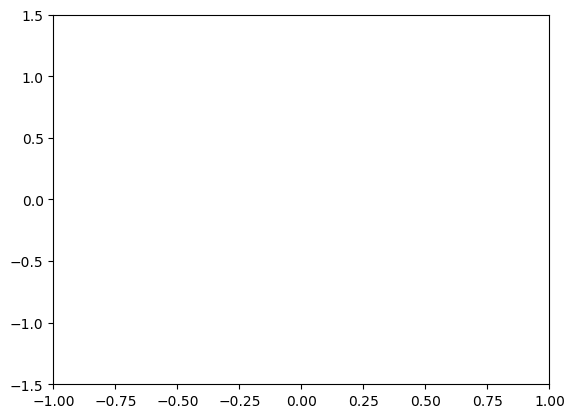

In [3]:
x_points = []
y_points = []
deg = [1]

def update_plot():
    clf()
    xlim([-1, 1])
    ylim([-1.5, 1.5])
    gca().set_autoscale_on(False)
    plot(x_points, y_points, 'o')

    if len(x_points) >= deg[0]+1:
        eval_points = np.linspace(-1, 1, 500)
        poly = np.poly1d(np.polyfit(
            np.array(x_points),
            np.array(y_points), deg[0]))
        plot(eval_points, poly(eval_points), "-")


def click(event):
    tb = get_current_fig_manager().toolbar
    if event.button == 1 and event.inaxes and tb.mode == '':
        x_points.append(event.xdata)
        y_points.append(event.ydata)

    if event.button == 3 and event.inaxes and tb.mode == '':
        if len(x_points) >= deg[0]+2:
            deg[0] += 1

    update_plot()
    draw()

update_plot()
connect('button_press_event', click)
show()